In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression


In [2]:
#Load the data set
claimants = pd.read_csv("claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
claimants[claimants.duplicated()]

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS


In [4]:
claimants.shape

(1340, 7)

In [5]:
len(claimants.CASENUM.unique())

1283

In [6]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)

In [7]:
#Shape of the data set
claimants.shape

(1340, 6)

In [8]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [9]:
claimants.isnull().sum().sum()

np.int64(290)

In [10]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [11]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [12]:
# Dividing our data into input and output variables
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [13]:
X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [14]:
Y.head()

0    0
1    1
2    1
3    0
4    1
Name: ATTORNEY, dtype: int64

In [15]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X,Y)

LinearRegression()

In [16]:
linear.predict(X)

array([0.11777368, 0.41159564, 0.46990802, ..., 0.56879252, 0.38444919,
       0.55987294])

In [17]:
from sklearn.metrics import r2_score
r2_score(Y, linear.predict(X))

0.06740699602264077

In [18]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [19]:
#Predict for X dataset
y_pred = classifier.predict(X)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [20]:
classifier.predict_proba(X)[:,1]

array([3.04592568e-06, 5.07167852e-01, 5.75164468e-01, ...,
       7.39029416e-01, 2.85953937e-01, 6.80430941e-01])

In [21]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict_proba(X)[:,1],
                         'y_predictions':y_pred})

In [22]:
y_pred_df

,actual,predicted_prob,y_predictions
0,0,0.000003,0
1,1,0.507168,1
2,1,0.575164,1
3,0,0.497716,0
4,1,0.640754,1
...,...,...,...
1334,1,0.712081,1
1336,0,0.425825,0
1337,1,0.739029,1
1338,0,0.285954,0


In [23]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix,accuracy_score


In [24]:
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[381 197]
 [123 395]]


In [25]:
accuracy_score(Y,y_pred)

0.708029197080292

In [26]:
#accuracy=(TP+TN)/(TP+TN+FP+FN)
Accuracy=((381+395)/(381+197+123+395))*100
Accuracy

70.8029197080292

In [27]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [28]:
classifier.score(X,Y)

0.708029197080292

In [29]:
# ROC Curve

In [30]:
classifier.predict_proba (X)[:,1]

array([3.04592568e-06, 5.07167852e-01, 5.75164468e-01, ...,
       7.39029416e-01, 2.85953937e-01, 6.80430941e-01])

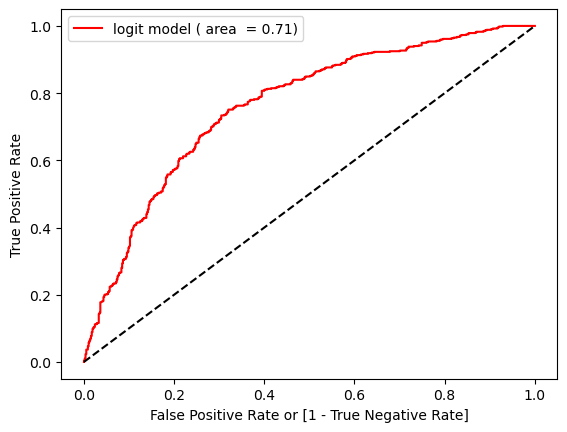

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()


In [32]:
df=pd.DataFrame({"CLMSEX":[1],"CLMINSUR":[1],"SEATBELT":[0],"CLMAGE":[40],"LOSS":[45]})

In [33]:
classifier.predict(df)

array([0])